## Business Problem Description:
### Enhancing Profitability and Market Efficiency in the Used Fashion Industry through Accurate Price Prediction

The used fashion industry has seen significant growth in recent years, driven by consumer interest in sustainability, affordability, and unique fashion choices. This market, comprising thrift stores, online marketplaces, and consignment shops, faces a unique challenge: accurately pricing used clothing and accessories. Incorrect pricing can lead to lost revenue, inventory stagnation, and customer dissatisfaction.

One of the primary challenges in the used fashion market is determining the optimal resale price of items. This price must balance profitability for sellers and attractiveness for buyers, considering factors such as brand, condition, style, and market demand. Currently, many sellers rely on manual appraisal or simplistic models, leading to inconsistent and often suboptimal pricing.

There is a need for a sophisticated, data-driven price prediction model that can provide accurate pricing recommendations for used fashion items. Such a model would enable sellers to maximize their revenue while ensuring competitive pricing for buyers. It would also streamline the pricing process, reducing the time and effort required for manual appraisal.

## About the dataset:

### Adidas Fashion Retail Products Dataset: 9300+ Products
https://www.kaggle.com/datasets/thedevastator/adidas-fashion-retail-products-dataset-9300-prod

This dataset contains information on over 1500+ Adidas fashion products. The data includes fields such as name, selling price, original price, currency, availability, color, category, source website, breadcrumbs, description, brand, images, country, language, average rating and reviews count. This data was collected from a variety of sources and compiled into one dataset for research purposes

This Adidas fashion dataset provides rich product information for over 9300+ products. It contains detailed information on product selling price, original price in multiple currencies ( USD / EUR / GBP ), product availability ( in stock / out of stock ), color , Category ( such as Apparel / Footwear ), source website , breadcrumbs , product description , brand name , link to product images , Country of origin and language . The average rating and reviews count are also included in the dataset so that researchers can study the correlation between them

### Independent variables


| Column name | Description |
| --- | --- |
| **name** | The name of the product. (String) |
| **sku** | The SKU or unique identifier for the product. (String) |
| **original_price** | The original price of the product in USD or Euros. (Float) |
| **currency** | The currency type for the selling price and original price. (String) |
| **availability** | The availability of the product. (String) |
| **color** | The color of the product. (String) |
| **category** | The category of the product. (String) |
| **source_website** | The source website from where the data was collected. (String) |
| **breadcrumbs** | The breadcrumbs or path to the product page on the source website. (String) |
| **description** | A brief description of the product provided by Adidas. (String) |
| **brand** | The brand of the product. (String) |
| **images** | Multiple product images provided by Adidas. (String) |
| **country** | The country of origin/destination for the product. (String) |
| **language** | The language in which the product page was displayed on the source website. (String) |
| **average_rating** | The average customer rating out of 5 stars. (Float) |
| **reviews_count** | The number of customer reviews for the product. (Integer) |
| **crawled_at** | The date and time when the data was collected. (String) |


### dependent variable (target variable)
| **selling_price** | The selling price of the product in USD or Euros. (Float) 

### ML

This is a typically Regression Problem and RMSE should be a good evaluation metric for price prediction.

The Root Mean Square Error (RMSE) is calculated as:

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

where:
- $n$ is the total number of observations,
- $y_i$ is the actual value of the i-th observation,
- $\hat{y}_i$ is the predicted value of the i-th observation.

RMSE squares the errors before averaging, which gives a higher weight to larger errors. This is especially useful in price prediction because it penalizes large deviations more heavily. In scenarios where overestimating or underestimating prices can have significant impacts , RMSE ensures that the model is particularly tuned to minimize these large errors.

## EDA

#### Loading data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('adidas_usa.csv')
# drop index and url
df = df.drop(['index','url','sku','images','crawled_at'],axis=1)

##### Drop all 1 unique columns

In [2]:
# print features
print(df.columns)

Index(['name', 'selling_price', 'original_price', 'currency', 'availability',
       'color', 'category', 'source', 'source_website', 'breadcrumbs',
       'description', 'brand', 'country', 'language', 'average_rating',
       'reviews_count'],
      dtype='object')


In [3]:
# drop all columns with only one unique value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col, inplace=True, axis=1)

# print features
print(df.columns)

Index(['name', 'selling_price', 'original_price', 'availability', 'color',
       'category', 'breadcrumbs', 'description', 'average_rating',
       'reviews_count'],
      dtype='object')


#### Missing Value

In [4]:
# check number of Nan values
print(df.isnull().sum())
# check percentage of Nan values in original_price
print('Percentage of Nan values in original_price:')
print(df['original_price'].isnull().sum()/len(df)*100)

# drop rows with Nan values in original_price
df = df.dropna(subset=['original_price'])

print('Number of Nan values in original_price after drop Nan:')
print(df['original_price'].isnull().sum())

name               0
selling_price      0
original_price    16
availability       0
color              0
category           0
breadcrumbs        0
description        0
average_rating     0
reviews_count      0
dtype: int64
Percentage of Nan values in original_price:
1.8934911242603552
Number of Nan values in original_price after drop Nan:
0


In [5]:
# type of data
df.dtypes

name               object
selling_price       int64
original_price     object
availability       object
color              object
category           object
breadcrumbs        object
description        object
average_rating    float64
reviews_count       int64
dtype: object

In [6]:
# original price is not int, so we need to convert it to int
df['original_price'].value_counts().head()

$65     68
$25     57
$100    55
$45     55
$30     49
Name: original_price, dtype: int64

In [7]:
# remove the $ sign, replace NaN values with 0, and convert to int
df['original_price'] = df['original_price'].str.replace('$','').fillna(0).astype(int)
df['original_price'].value_counts().head()

C:\Users\xiaob\AppData\Local\Temp\ipykernel_51468\3331688770.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['original_price'] = df['original_price'].str.replace('$','').fillna(0).astype(int)


65     68
25     57
100    55
45     55
30     49
Name: original_price, dtype: int64

#### Perform Analysis

##### Price

c:\Users\xiaob\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\xiaob\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


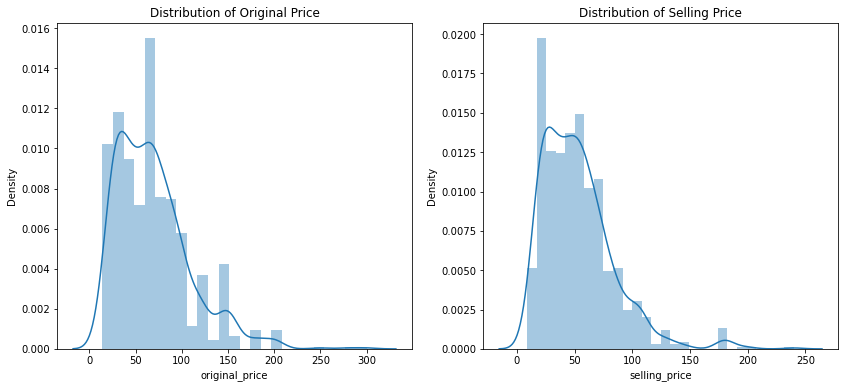

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.distplot(df['original_price'].dropna(), kde=True)
plt.title('Distribution of Original Price')

plt.subplot(1, 2, 2)
sns.distplot(df['selling_price'].dropna(), kde=True)
plt.title('Distribution of Selling Price')

plt.show()

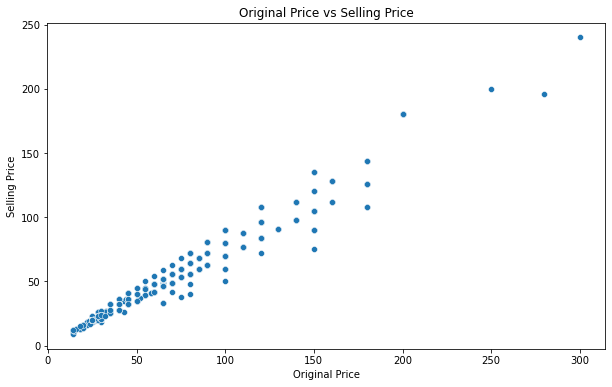

In [9]:
# original price with selling price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_price', y='selling_price', data=df)
plt.title('Original Price vs Selling Price')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')
plt.show()

In [10]:
# mean, median price of original price and selling price
print('Original Price')
print('Mean: ', df['original_price'].mean())
print('Median: ', df['original_price'].median())
print('Selling Price')
print('Mean: ', df['selling_price'].mean())
print('Median: ', df['selling_price'].median())

Original Price
Mean:  69.00844390832329
Median:  65.0
Selling Price
Mean:  52.91194209891435
Median:  48.0


In [11]:
# percentiles of original price and selling price
print('Original Price')
print(df['original_price'].quantile([0.05, 0.95]))
print('Selling Price')
print(df['selling_price'].quantile([0.05, 0.95]))

Original Price
0.05     25.0
0.95    150.0
Name: original_price, dtype: float64
Selling Price
0.05     18.0
0.95    105.0
Name: selling_price, dtype: float64


In [12]:
# According to category, how much does selling_price decrease from original_price on average
print(df.groupby('category')['original_price'].mean().sort_values(ascending=False) 
      -
      df.groupby('category')['selling_price'].mean().sort_values(ascending=False))


# According to category, what percentage selling_price decreases from original_price
print(df.groupby('category')['selling_price'].mean().sort_values(ascending=False) 
    / 
df.groupby('category')['original_price'].mean().sort_values(ascending=False) * 100)


category
Shoes          21.689573
Clothing       10.597561
Accessories     9.050633
dtype: float64
category
Shoes          76.056817
Clothing       78.518015
Accessories    74.455163
dtype: float64


In [13]:
# check <=0 values in original_price and selling_price
print('Number of 0 values in original_price: ', (df['original_price'] <= 0).sum())
print('Number of 0 values in selling_price: ', (df['selling_price'] <= 0).sum())

Number of 0 values in original_price:  0
Number of 0 values in selling_price:  0



* __Original price__
    - Median price is 65
    - Mean price is 69
    - 95% of prices < 150
* __Selling price__
    - Median price is 48
    - Mean is 53
    - 95% of price < 105

##### Availability (in stock)

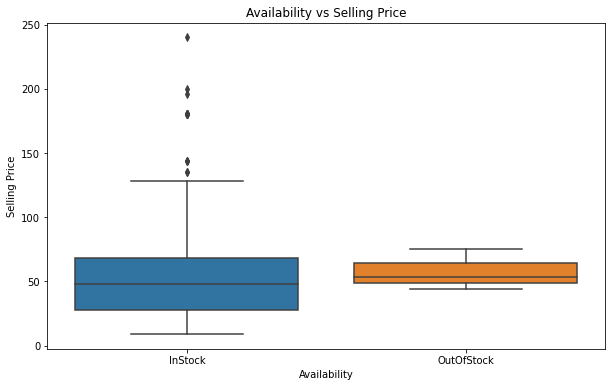

In [14]:
# Create a boxplot plot to visualize the relationship between availability and selling_price
plt.figure(figsize=(10, 6))
sns.boxplot(x='availability', y='selling_price', data=df)
plt.title('Availability vs Selling Price')
plt.xlabel('Availability')
plt.ylabel('Selling Price')
plt.show()


* The median selling price for products that are 'InStock' appears to be lower than for those 'OutOfStock'.
* The interquartile range (IQR), which represents the middle 50% of the prices, is wider for 'InStock' items, indicating more variability in the selling price for these items.

This could be:
* Items that are more in demand and less frequently avaibale can command higher prices.
* Higher-priced items may sell less frequently and thus be more likely to go out of stock between restocking.

##### Category

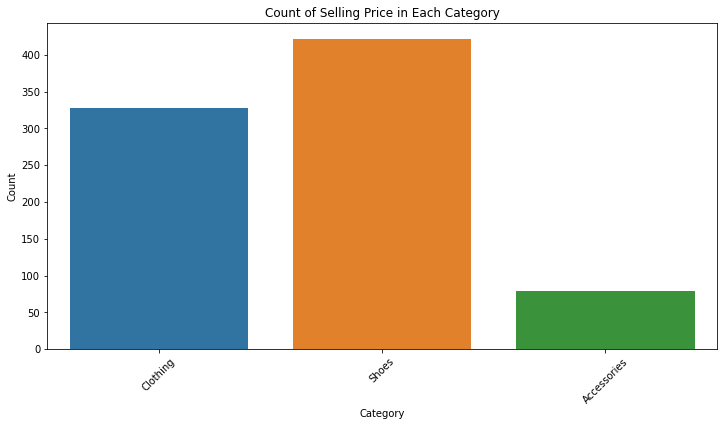

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df)
plt.title('Count of Selling Price in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


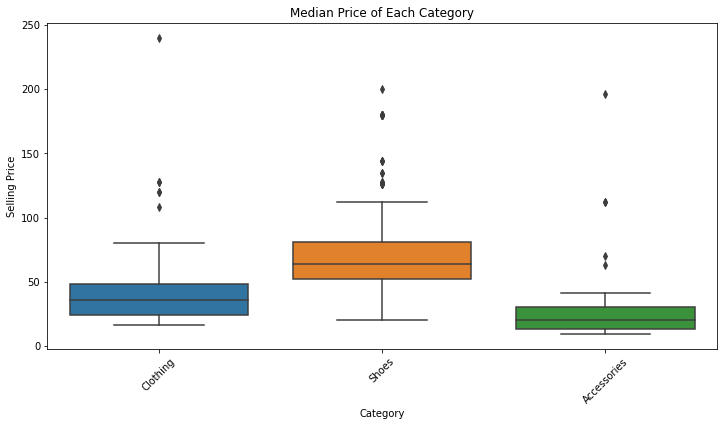

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='selling_price', data=df)
plt.title('Median Price of Each Category')
plt.xlabel('Category')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()


* Median selling prices for Shoes are higher than other 2 categories
* Accessories prices are lower than Clothing but not big, they are in close range

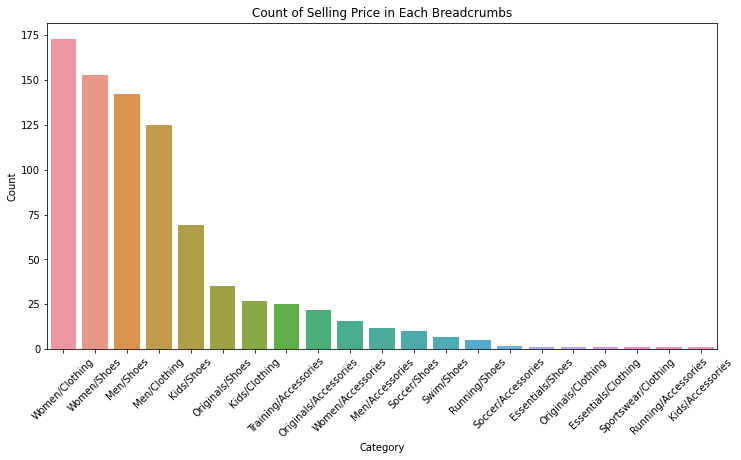

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='breadcrumbs', data=df, order=df['breadcrumbs'].value_counts().index)
plt.title('Count of Selling Price in Each Breadcrumbs')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Women/Clothing, Women/Shoes, Men/Shoes, Men/Clothing are top 4 most popular product, and the number of sales are much higher than others

In [18]:
# reamin only top 10 breadcrumbs
df = df[df['breadcrumbs'].isin(df['breadcrumbs'].value_counts().head(10).index)]

In [19]:
print(df.columns)

Index(['name', 'selling_price', 'original_price', 'availability', 'color',
       'category', 'breadcrumbs', 'description', 'average_rating',
       'reviews_count'],
      dtype='object')


#### Data cleaning

##### Clean name

In [20]:
import re
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['clean_name'] = df['name'].apply(clean_text)


##### Clean breadcrumbs

In [21]:
def clean_breadcrumbs(breadcrumbs):
    if isinstance(breadcrumbs, float):
        return ''
    cleaned_breadcrumbs = breadcrumbs.split('/')
    cleaned_breadcrumbs = ' '.join(cleaned_breadcrumbs)
    return cleaned_breadcrumbs

df['breadcrumbs_clean'] = df['breadcrumbs'].apply(clean_breadcrumbs)

#df.head()

##### Clean description

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_description(description):
    # Convert to lowercase
    if isinstance(description, float):
        description = str(description)
    description = description.lower()
    
    # Remove punctuation
    description = description.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(description)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [i for i in tokens if not i in stop_words]
    
    # Stemming
    stemmer= PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

df['description_clean'] = df['description'].apply(preprocess_description)

#df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiaob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiaob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df.head()

,name,selling_price,original_price,availability,color,category,breadcrumbs,description,average_rating,reviews_count,clean_name,breadcrumbs_clean,description_clean
15,Essentials Loose Logo Tank Top,20,25,InStock,Purple,Clothing,Women/Clothing,What's on the agenda? Whether it's a quick lun...,4.8,116,essentials loose logo tank top,Women Clothing,what agenda whether quick lunch hour workout c...
16,Essentials Loose Logo Tank Top,20,25,InStock,Pink,Clothing,Women/Clothing,What's on the agenda? Whether it's a quick lun...,4.8,116,essentials loose logo tank top,Women Clothing,what agenda whether quick lunch hour workout c...
18,Essentials Loose Logo Tank Top,20,25,InStock,Green,Clothing,Women/Clothing,What's on the agenda? Whether it's a quick lun...,4.8,116,essentials loose logo tank top,Women Clothing,what agenda whether quick lunch hour workout c...
19,Formotion Sculpt Tights,48,80,InStock,Blue,Clothing,Women/Clothing,Sometimes confidence comes in a surprising for...,4.2,144,formotion sculpt tights,Women Clothing,sometim confid come surpris form adida tight u...
21,Pureboost 21 Shoes,91,130,InStock,Purple,Shoes,Women/Shoes,For quick morning miles and more. These adidas...,4.5,63,pureboost shoes,Women Shoes,quick morn mile adida pureboost perform run sh...


In [24]:
#Remove uncleaned columns
df.drop(['name','breadcrumbs','description'], axis=1, inplace=True)

In [25]:
df.head()

,selling_price,original_price,availability,color,category,average_rating,reviews_count,clean_name,breadcrumbs_clean,description_clean
15,20,25,InStock,Purple,Clothing,4.8,116,essentials loose logo tank top,Women Clothing,what agenda whether quick lunch hour workout c...
16,20,25,InStock,Pink,Clothing,4.8,116,essentials loose logo tank top,Women Clothing,what agenda whether quick lunch hour workout c...
18,20,25,InStock,Green,Clothing,4.8,116,essentials loose logo tank top,Women Clothing,what agenda whether quick lunch hour workout c...
19,48,80,InStock,Blue,Clothing,4.2,144,formotion sculpt tights,Women Clothing,sometim confid come surpris form adida tight u...
21,91,130,InStock,Purple,Shoes,4.5,63,pureboost shoes,Women Shoes,quick morn mile adida pureboost perform run sh...


#### Train & Test Data

In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (629, 9)
Shape of X_test: (158, 9)
Shape of y_train: (629,)
Shape of y_test: (158,)


In [27]:
X_train.head()

,original_price,availability,color,category,average_rating,reviews_count,clean_name,breadcrumbs_clean,description_clean
231,40,InStock,Grey,Clothing,4.8,239,adicolor classics long sleeve tee,Women Clothing,alongsid rich histori 3stripe come love sport ...
153,45,InStock,Black,Shoes,4.4,207,adilette slides,Women Shoes,still wear adida slide cool weather add sock r...
800,50,InStock,Purple,Accessories,4.9,76,vfa backpack,Women Accessories,get readi morn feel like pack summer camp one ...
658,65,InStock,Purple,Clothing,4.6,14,adidas sportswear future icons hoodie,Women Clothing,put time put effort put adida sweatshirt worko...
74,110,InStock,Black,Shoes,5.0,1,zx k boost shoes,Men Shoes,zx line pioneer new approach speed rais bar co...


##### BOW featurized text features with CountVectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
# Import the necessary libraries
# Create an instance of CountVectorizer
vectorizer = CountVectorizer(min_df=3)

# Fit the vectorizer on the training data
X_train_name_bow = vectorizer.fit_transform(X_train['clean_name'])

# Transform the test data using the fitted vectorizer
X_test_name_bow = vectorizer.transform(X_test['clean_name'])

print(X_train_name_bow.shape)
print(X_test_name_bow.shape)


(629, 171)
(158, 171)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# Import the necessary libraries
# Create an instance of CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2), max_features=20000)

# Fit the vectorizer on the training data
X_train_description_bow = vectorizer.fit_transform(X_train['description_clean'])

# Transform the test data using the fitted vectorizer
X_test_description_bow = vectorizer.transform(X_test['description_clean'])

print(X_train_description_bow.shape)
print(X_test_description_bow.shape)


(629, 12251)
(158, 12251)


##### BOW featurized categorical features

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
# Import the necessary libraries
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
X_train_availability_bow = vectorizer.fit_transform(X_train['availability'])

# Transform the test data using the fitted vectorizer
X_test_availability_bow = vectorizer.transform(X_test['availability'])

print(X_train_availability_bow.shape)
print(X_test_availability_bow.shape)


(629, 2)
(158, 2)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# Import the necessary libraries
# Create an instance of CountVectorizer
vectorizer = CountVectorizer(min_df=5)

# Fit the vectorizer on the training data
X_train_color_bow = vectorizer.fit_transform(X_train['color'])

# Transform the test data using the fitted vectorizer
X_test_color_bow = vectorizer.transform(X_test['color'])

print(X_train_color_bow.shape)
print(X_test_color_bow.shape)


(629, 12)
(158, 12)


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
# Import the necessary libraries
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
X_train_category_bow = vectorizer.fit_transform(X_train['category'])

# Transform the test data using the fitted vectorizer
X_test_category_bow = vectorizer.transform(X_test['category'])

print(X_train_category_bow.shape)
print(X_test_category_bow.shape)


(629, 3)
(158, 3)


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
# Import the necessary libraries
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
X_train_breadcrumbs_bow = vectorizer.fit_transform(X_train['breadcrumbs_clean'])

# Transform the test data using the fitted vectorizer
X_test_breadcrumbs_bow = vectorizer.transform(X_test['breadcrumbs_clean'])

print(X_train_breadcrumbs_bow.shape)
print(X_test_breadcrumbs_bow.shape)


(629, 8)
(158, 8)


##### Numerical Features with MinMaxScaler
* scales data in range [0,1]
* in range [-1,1] if have negative values

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the data
X_train_original_price_scaled = scaler.fit_transform(X_train[['original_price']])
X_test_original_price_scaled = scaler.transform(X_test[['original_price']])
print(X_train_original_price_scaled.shape)
print(X_test_original_price_scaled.shape)


X_train_average_rating_scaled = scaler.fit_transform(X_train[['average_rating']])
X_test_average_rating_scaled = scaler.transform(X_test[['average_rating']])
print(X_train_average_rating_scaled.shape)
print(X_test_average_rating_scaled.shape)

X_train_reviews_count_scaled = scaler.fit_transform(X_train[['reviews_count']])
X_test_reviews_count_scaled = scaler.transform(X_test[['reviews_count']])
print(X_train_reviews_count_scaled.shape)
print(X_test_reviews_count_scaled.shape)

(629, 1)
(158, 1)
(629, 1)
(158, 1)
(629, 1)
(158, 1)


##### Target Variable

In [35]:
#scaling target variable using log1p
import numpy as np

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

##### Hstack finial dataset

In [36]:
from scipy.sparse import hstack

# horizontally stack sparse matrices
X_tr_BOW = hstack((X_train_name_bow, X_train_description_bow, X_train_availability_bow, X_train_color_bow, X_train_category_bow, X_train_breadcrumbs_bow
                   , X_train_original_price_scaled, X_train_average_rating_scaled, X_train_reviews_count_scaled))
X_te_BOW = hstack((X_test_name_bow, X_test_description_bow, X_test_availability_bow, X_test_color_bow, X_test_category_bow, X_test_breadcrumbs_bow
                   , X_test_original_price_scaled, X_test_average_rating_scaled, X_test_reviews_count_scaled))

print(X_tr_BOW.shape)
print(X_te_BOW.shape)

(629, 12450)
(158, 12450)


##### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(X_tr_BOW, y_train)


# Make predictions on the training data
train_predictions = model.predict(X_tr_BOW)

# Make predictions on the test data
test_predictions = model.predict(X_te_BOW)

# Calculate RMSLE on the train data
train_rmsle = np.sqrt(mean_squared_error(y_train, train_predictions))

# Calculate RMSLE on the test data
test_rmsle = np.sqrt(mean_squared_error(y_test, test_predictions))

print('RMSLE on the train data:', train_rmsle)
print('RMSLE on the test data:', test_rmsle)


RMSLE on the train data: 0.022246486201472668
RMSLE on the test data: 0.2403130195760311


##### Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

# Create an instance of Ridge regression
ridge_model = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_model.fit(X_tr_BOW, y_train)

# Make predictions on the training data
train_predictions_ridge = ridge_model.predict(X_tr_BOW)

# Make predictions on the test data
test_predictions_ridge = ridge_model.predict(X_te_BOW)

# Calculate RMSLE on the train data
train_rmsle_ridge = np.sqrt(mean_squared_error(y_train, train_predictions_ridge))

# Calculate RMSLE on the test data
test_rmsle_ridge = np.sqrt(mean_squared_error(y_test, test_predictions_ridge))

print('RMSLE on the train data (Ridge regression):', train_rmsle_ridge)
print('RMSLE on the test data (Ridge regression):', test_rmsle_ridge)

RMSLE on the train data (Ridge regression): 0.024623897906659278
RMSLE on the test data (Ridge regression): 0.23043100145665868


In [39]:
from sklearn.linear_model import Ridge

# Create an instance of Ridge regression with a higher alpha value
ridge_model_high_alpha = Ridge(alpha=10.0)

# Fit the model on the training data
ridge_model_high_alpha.fit(X_tr_BOW, y_train)

# Make predictions on the training data
train_predictions_ridge_high_alpha = ridge_model_high_alpha.predict(X_tr_BOW)

# Make predictions on the test data
test_predictions_ridge_high_alpha = ridge_model_high_alpha.predict(X_te_BOW)

# Calculate RMSLE on the train data
train_rmsle_ridge_high_alpha = np.sqrt(mean_squared_error(y_train, train_predictions_ridge_high_alpha))

# Calculate RMSLE on the test data
test_rmsle_ridge_high_alpha = np.sqrt(mean_squared_error(y_test, test_predictions_ridge_high_alpha))

print('RMSLE on the train data (Ridge regression with high alpha):', train_rmsle_ridge_high_alpha)
print('RMSLE on the test data (Ridge regression with high alpha):', test_rmsle_ridge_high_alpha)


RMSLE on the train data (Ridge regression with high alpha): 0.046527920390621307
RMSLE on the test data (Ridge regression with high alpha): 0.23457750509103387


##### XGBoost

In [40]:
#!pip install xgboost


In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Create an instance of XGBRegressor
xgb_model = XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_tr_BOW, y_train)

# Make predictions on the training data
train_predictions_xgb = xgb_model.predict(X_tr_BOW)

# Make predictions on the test data
test_predictions_xgb = xgb_model.predict(X_te_BOW)

# Calculate RMSLE on the train data
train_rmsle_xgb = np.sqrt(mean_squared_error(y_train, train_predictions_xgb))

# Calculate RMSLE on the test data
test_rmsle_xgb = np.sqrt(mean_squared_error(y_test, test_predictions_xgb))

print('RMSLE on the train data (XGBRegressor):', train_rmsle_xgb)
print('RMSLE on the test data (XGBRegressor):', test_rmsle_xgb)


RMSLE on the train data (XGBRegressor): 0.015468691233568022
RMSLE on the test data (XGBRegressor): 0.09186476606638927


##### Random Forest

* Since this dataset perform much better on non-linear relationships, i will try random forest and SVM

In [42]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt'],
#     'bootstrap': [True, False]
# }

# # Create an instance of the random forest regressor
# rf_model = RandomForestRegressor()

# # Create an instance of RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# # Fit the random search on the training data
# random_search.fit(X_tr_BOW, y_train)

# # Print the best parameters found
# print("Best parameters:", random_search.best_params_)

# # Print the best score found
# print("Best score:", random_search.best_score_)


In [43]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Create an instance of RandomForestRegressor with the best parameters
# rf_model = RandomForestRegressor(n_estimators=random_search.best_params_['n_estimators'], max_depth=random_search.best_params_['max_depth'], 
#                                  min_samples_split=random_search.best_params_['min_samples_split'],
#                                  min_samples_leaf=random_search.best_params_['min_samples_leaf'],
#                                  max_features='auto', bootstrap=True)

# # Fit the model on the training data
# rf_model.fit(X_tr_BOW, y_train)

# # Make predictions on the training data
# train_predictions_rf = rf_model.predict(X_tr_BOW)

# # Make predictions on the test data
# test_predictions_rf = rf_model.predict(X_te_BOW)

# # Calculate RMSLE on the train data
# train_rmsle_rf = np.sqrt(mean_squared_error(y_train, train_predictions_rf))

# # Calculate RMSLE on the test data
# test_rmsle_rf = np.sqrt(mean_squared_error(y_test, test_predictions_rf))

# print('RMSLE on the train data (Random Forest):', train_rmsle_rf)
# print('RMSLE on the test data (Random Forest):', test_rmsle_rf)


## Conclusion

1. Big overfitting in Linear and Ridge Regression

        Linear and ridge regression are relatively simple linear models. Even ridge regression includes regularization to prevent overfitting.

2. Non-linear relationship between features and target

        Linear models cannot capture non-linear relationships, leading to poor generalization on testset

3. Small dataset

        629 on training and 158 on testing are too small, need more data to prevent overfitting.

## Future Work:



1. Write automated crawler scripts to crawl larger data sets from various retail second-hand websites

2. Try complex model ensmbles

3. After getting enough data try linear models again to see if small dataset is the problem of overfitting

4. Try Deep learning models lke LSTM